# Data Warehousing and Data Mining

## Labs

### Prepared by Gilroy Gordon

#### Contact Information

SCIT ext. 3643

ggordonutech@gmail.com

gilroy.gordon@utech.edu.jm

### Week 3 - Decision Trees in R


Additional Reference Resources:

Decision Trees: https://www.statmethods.net/advstats/cart.html

Importing Different Types of Data: http://www.milanor.net/blog/read-excel-files-from-r/

Party package (Partitioning Recursively) : https://cran.r-project.org/web/packages/party/party.pdf

xlsx packages requires rJava : https://github.com/hannarud/r-best-practices/wiki/Installing-RJava-(Ubuntu)

Objectives
----
---
     
     > Data Selection
     > Data Preprocessing
         > Noisy Data - Invalid Attribute Values
         > Casewise Deletion
     > Data Transformation
         > Dummy Encoding
     > Data Mining
          > Decision Trees
     > Model Evaluation and Prediction
          > Train/Test Split - 70/30
     > Presentation
          > Tree Chart
          > Tree Rules
          > Confusion Matrix

----

## Import required libraries and acquire data

NB. The data required was retrieved from the required text for this course. This should assist you in following the concepts from the book better

In [1]:
#library("gdata")

In [2]:
data_path = './data/Creditcardprom.xls' # Path to data file
my.data =  read.csv('./data/Creditcardprom.csv',header=TRUE,check.names=FALSE) # read data from the first sheet 

In [3]:
#view the data
my.data 

Income Range,Magazine Promo,Watch Promo,Life Ins Promo,Credit Card Ins.,Sex,Age
"40-50,000",Yes,No,No,No,Male,45
"30-40,000",Yes,Yes,Yes,No,Female,40
"40-50,000",No,No,No,No,Male,42
"30-40,000",Yes,Yes,Yes,Yes,Male,43
"50-60,000",Yes,No,Yes,No,Female,38
"20-30,000",No,No,No,No,Female,55
"30-40,000",Yes,No,Yes,Yes,Male,35
"20-30,000",No,Yes,No,No,Male,27
"30-40,000",Yes,No,No,No,Male,43
"30-40,000",Yes,Yes,Yes,No,Female,41


In [4]:
# What columns are in the data set ? Do they have spaces that I should consider
colnames(my.data) 

[1] "Income Range"     "Magazine Promo"   "Watch Promo"      "Life Ins Promo"  
[5] "Credit Card Ins." "Sex"              "Age"

In [5]:
# The first two(2) rows have invalid data. Let us perform casewise deletion to remove these rows from the data set
my.data = my.data[-c(0,1), ] # dropping items 0 and 1 from axis 0 or the x axis (rows)
# NB. The "-" sign used to request the complement of the data
my.data #viewing data

,Income Range,Magazine Promo,Watch Promo,Life Ins Promo,Credit Card Ins.,Sex,Age
2,"30-40,000",Yes,Yes,Yes,No,Female,40
3,"40-50,000",No,No,No,No,Male,42
4,"30-40,000",Yes,Yes,Yes,Yes,Male,43
5,"50-60,000",Yes,No,Yes,No,Female,38
6,"20-30,000",No,No,No,No,Female,55
7,"30-40,000",Yes,No,Yes,Yes,Male,35
8,"20-30,000",No,Yes,No,No,Male,27
9,"30-40,000",Yes,No,No,No,Male,43
10,"30-40,000",Yes,Yes,Yes,No,Female,41
11,"40-50,000",No,Yes,Yes,No,Female,43


In [6]:
# We are only interested in a few columns
# extracting only sex, age and income,range, watch promo and life insurance promo
data2 = my.data[c('Income Range','Sex','Age', 'Watch Promo', 'Life Ins Promo')]
data2

,Income Range,Sex,Age,Watch Promo,Life Ins Promo
2,"30-40,000",Female,40,Yes,Yes
3,"40-50,000",Male,42,No,No
4,"30-40,000",Male,43,Yes,Yes
5,"50-60,000",Female,38,No,Yes
6,"20-30,000",Female,55,No,No
7,"30-40,000",Male,35,No,Yes
8,"20-30,000",Male,27,Yes,No
9,"30-40,000",Male,43,No,No
10,"30-40,000",Female,41,Yes,Yes
11,"40-50,000",Female,43,Yes,Yes


## Aim : Use a decision tree to identify suitable rules for a Life Ins Promo

In [7]:
# separate our data into dependent (Y) and independent(X) variables
X_data = data2[c('Income Range','Sex','Age', 'Watch Promo')]
Y_data = data2[c('Life Ins Promo')]

## 70/30 Train Test Split

We will split the data using a 70/30 split. i.e. 70% of the data will be randomly chosen to train the model
and 30% will be used to evaluate the model

In [8]:
require(caTools)  # loading caTools library

Loading required package: caTools


In [9]:
set.seed(400)   #  set seed to ensure you always have same random numbers generated
# splits the data in the ratio mentioned in SplitRatio. After splitting marks these rows as logical TRUE and the the remaining are marked as logical FALSE
sample = sample.split(X_data,SplitRatio = 0.70) 
# creates a training dataset named train1 with rows which are marked as TRUE
X_train=subset(X_data,sample ==TRUE) 
X_test =subset(X_data, sample==FALSE)
y_train=subset(Y_data,sample ==TRUE) 
y_test =subset(Y_data, sample==FALSE)

# The package we will use in R will not require that we split the independent and dependent variables however

train = subset(data2,sample=TRUE)
test = subset(data2,sample=FALSE)

## Building the Decision Tree

In [10]:
library(rpart)

In [11]:
# Build the classifier  by training it on all the data, rpart has cross validation built in
clf <- rpart("`Life Ins Promo` ~ `Income Range` + `Sex` + `Age` + `Watch Promo`",
   method="class",data=train,control=rpart.control(minsplit=2)) # method class is used because dependent is caegorical

## Describing the tree and visualizations

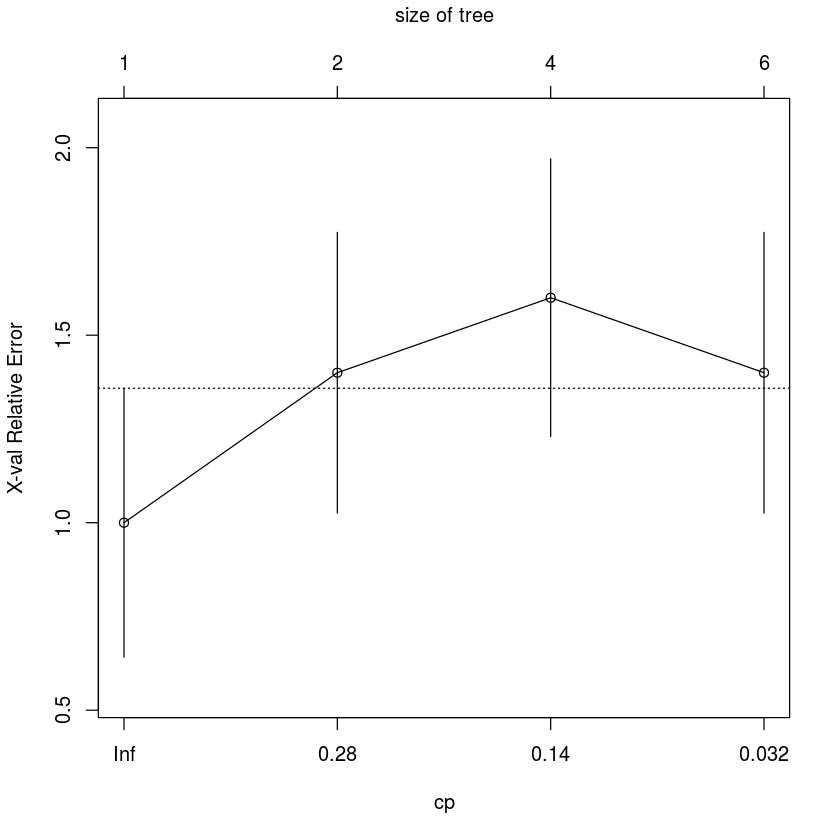

In [12]:
plotcp(clf) # visualize cross-validation results 

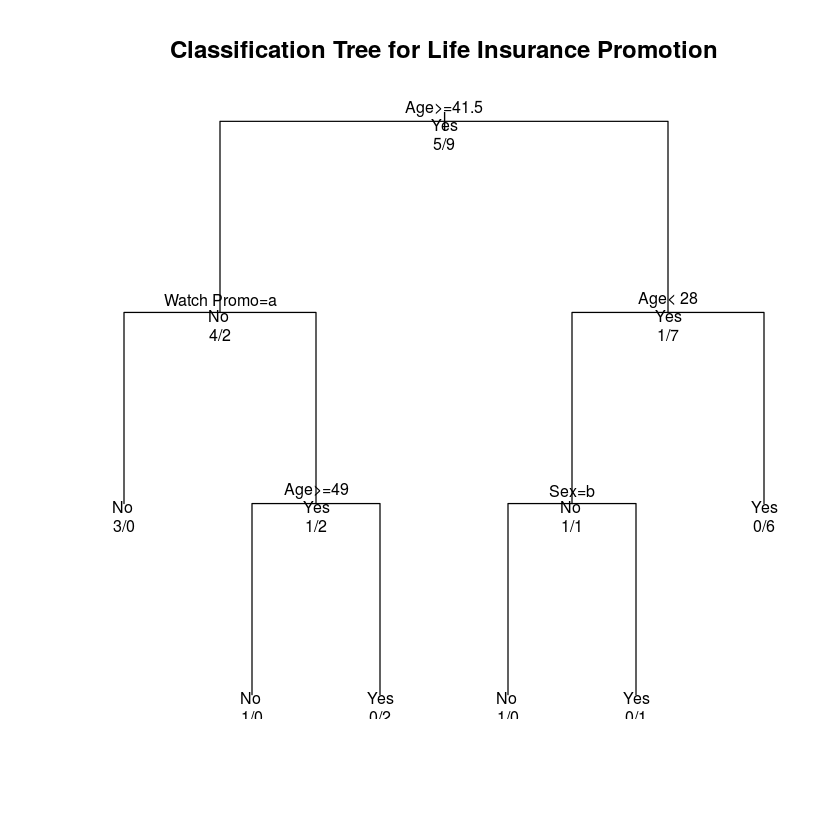

In [13]:
# plot tree
plot(clf, uniform=TRUE,
   main="Classification Tree for Life Insurance Promotion")
text(clf, use.n=TRUE, all=TRUE, cex=.8)

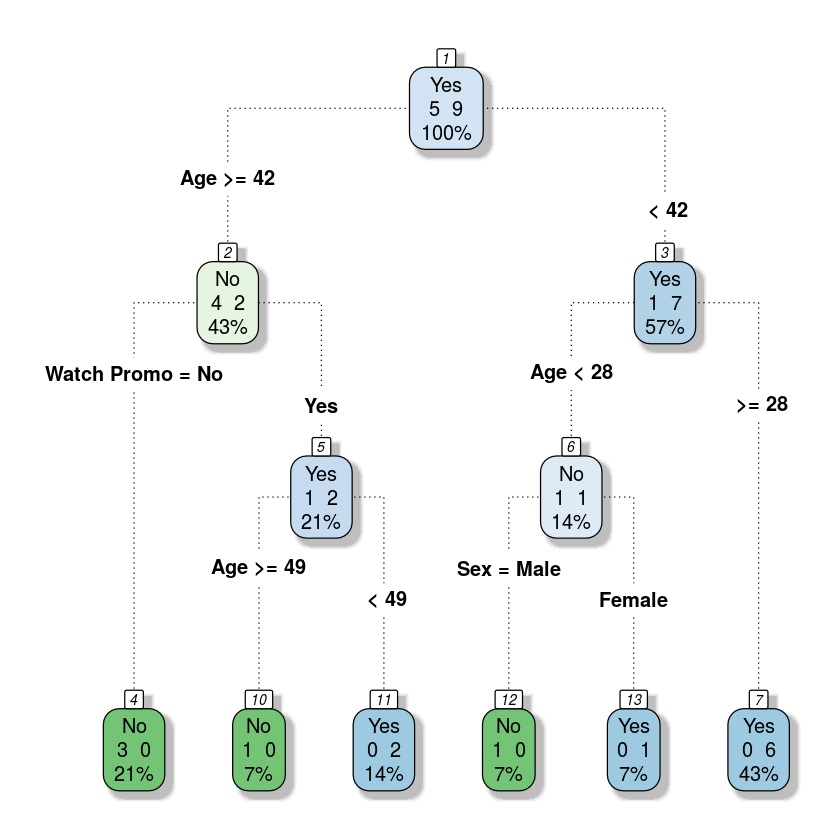

In [14]:
library(rpart)
library(rpart.plot)
rpart.plot(clf, # please see help(rpart.plot)
type=4,
extra=101, 
box.palette="GnBu",
branch.lty=3, 
shadow.col="gray", 
nn=TRUE
)

In [15]:
help(rpart.plot)

In [16]:
summary(clf) # display the results 

Call:
rpart(formula = "`Life Ins Promo` ~ `Income Range` + `Sex` + `Age` + `Watch Promo`", 
    data = train, method = "class", control = rpart.control(minsplit = 2))
  n= 14 

    CP nsplit rel error xerror      xstd
1 0.40      0       1.0    1.0 0.3585686
2 0.20      1       0.6    1.4 0.3741657
3 0.10      3       0.2    1.6 0.3703280
4 0.01      5       0.0    1.4 0.3741657

Variable importance
         Age Income Range          Sex  Watch Promo 
          50           18           16           16 

Node number 1: 14 observations,    complexity param=0.4
  predicted class=Yes  expected loss=0.3571429  P(node) =1
    class counts:     5     9
   probabilities: 0.357 0.643 
  left son=2 (6 obs) right son=3 (8 obs)
  Primary splits:
      Age          < 41.5 to the right, improve=2.0119050, (0 missing)
      Income Range splits as  LRLR,     improve=1.2857140, (0 missing)
      Sex          splits as  RL,       improve=1.2857140, (0 missing)
      Watch Promo  splits as  LR,       im